In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
class_names=["T_shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
             "Sneaker","Bag","Ankle boot"]

In [6]:
(X_train_full,y_train_full),(X_tset,y_test)=fashion_mnist.load_data()

In [7]:
X_train_full=X_train_full.reshape((60000,28,28,1))# datalength pixel pixel channel
X_test=X_test.reshape((10000,28,28,1))

In [8]:
X_train_n=X_train_full/255.
X_test_n=X_tset/255.

In [9]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_tset=X_test_n

In [10]:
X_test=X_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

## Covolution layer formation

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',
                              activation='relu',input_shape=(28,28,1)))

In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 300)               6489900   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [17]:
model_history=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 69s 79ms/step - loss: 0.7273 - accuracy: 0.7478 - val_loss: 0.7216 - val_accuracy: 0.7374
Epoch 2/30
860/860 [==============================] - 68s 79ms/step - loss: 0.4891 - accuracy: 0.8233 - val_loss: 0.4652 - val_accuracy: 0.8202
Epoch 3/30
860/860 [==============================] - 67s 78ms/step - loss: 0.4383 - accuracy: 0.8401 - val_loss: 0.8414 - val_accuracy: 0.7186
Epoch 4/30
860/860 [==============================] - 67s 78ms/step - loss: 0.4074 - accuracy: 0.8526 - val_loss: 0.3924 - val_accuracy: 0.8578
Epoch 5/30
860/860 [==============================] - 69s 80ms/step - loss: 0.3876 - accuracy: 0.8595 - val_loss: 0.3950 - val_accuracy: 0.8568
Epoch 6/30
860/860 [==============================] - 66s 76ms/step - loss: 0.3677 - accuracy: 0.8659 - val_loss: 0.3489 - val_accuracy: 0.8764
Epoch 7/30
860/860 [==============================] - 64s 74ms/step - loss: 0.3537 - accuracy: 0.8717 - val_loss: 0.3765 - val_accuracy:

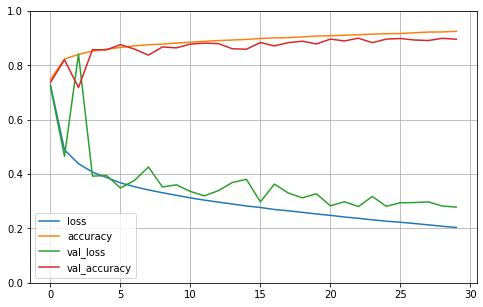

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
X_new=X_tset[:3]
y_pred=model.predict(X_new)
y_pred

1/1 [==============================] - 0s 91ms/step


array([[1.2356628e-05, 3.1214822e-07, 5.4315960e-06, 1.4252248e-07,
        7.6445440e-07, 2.6677565e-03, 2.2722104e-06, 7.6248534e-03,
        1.2151241e-04, 9.8956454e-01],
       [2.8415260e-04, 6.4097028e-10, 9.7856861e-01, 2.1183278e-07,
        2.0723332e-02, 7.5431359e-09, 4.2355678e-04, 9.4706731e-09,
        9.4676430e-08, 2.1800355e-09],
       [7.4378555e-08, 9.9999869e-01, 6.0807031e-09, 8.3938517e-07,
        3.4218510e-07, 4.6096052e-10, 2.0729631e-09, 9.8493297e-12,
        1.2358252e-08, 3.7478524e-11]], dtype=float32)

In [27]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


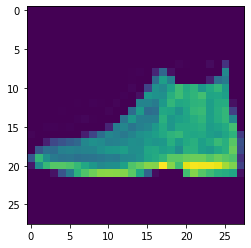

In [29]:
print(plt.imshow(X_test[0].reshape((28,28,))))

In [ ]:
#keras.backend.clear.session

In [ ]:
#del model